<a href="https://colab.research.google.com/github/Kala-Ayush/Data-Analysis/blob/main/Auto_MPG_(Regression)_Ayush_Kala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions






Perform a linear regression using the Auto MPG dataset (loaded for you in the setup section).

Incorporate the following aspects:

  1. Data
     + Load the data.
     + Explore the data, including distributions, correlation, etc. Make plots.
     + Check for null values. Handle null values by dropping or imputing.
     + Choose target and feature(s).
     + Encode features as necessary (ordinal vs one-hot).
     + Scale / normalize features as necessary.
     + Split into train and test sets (specifically 80/20 split). Remember to use a random seed to ensure your results are reproducible.
  2. Model
    + Use a `LinearRegression` model from sklearn.
    + Train the model using the training data.
    + Inspect artifacts from the training process:
      + Print the model's coeficients and intercept (i.e. line of best fit).
      + Inspect the coefficients by wrapping them in a pandas Series and labeling them with their corresponding feature names, then sort them in descending order.
      + Interpret the coefficients - which features contribute most to our model's predictive ability?
  3. Evaluation
    + Make predictions for the test set.
    + Evaluate the results using sklearn regression metrics, specifically the r-squared score and mean squared error (MSE). Calculate the Root Mean Squared Error (RMSE) as well, based on the MSE. Interpret the results - how well did the model do?




## Setup

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
%%capture
!pip install ucimlrepo

## Data Loading


### Auto MPG Dataset

https://archive.ics.uci.edu/dataset/9/auto+mpg

The Auto MPG dataset provides information about automobile fuel efficiency, in terms of miles per gallon (MPG).

We'll be using a version of this dataset hosted by UCI. They have a great repository of machine learning datasets, and now a cool new website and python package we can use to load the data easily:


In [ ]:
from ucimlrepo import fetch_ucirepo

repo = fetch_ucirepo(id=9)
print(type(repo)) # assuming this is dictionary-like

<class 'ucimlrepo.dotdict.dotdict'>


In [ ]:
repo.keys()

dict_keys(['data', 'metadata', 'variables'])

Repo has data, metadata (dataset description), and variables (data dictionary of sorts).

In [ ]:
repo.metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [ ]:
repo.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


We see the target is "mpg" and there are a number of features - some continuous, some categorical. We'll need to further investigate and decide how to encode the categorical features.

We see there are some missing values in the "horsepower" column. We'll need to handle them later.

Finally, here is our dataset:

In [ ]:
#auto_mpg.data.keys()

In [ ]:
#print(type(auto_mpg.data.features))
#print(type(auto_mpg.data.targets))
#print(type(auto_mpg.data.ids))

In [ ]:
df = repo.data.original
df.head()

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


What's the "origin" feature about?

One can possibly interpret from the car names, or consult various [internet](https://rstudio-pubs-static.s3.amazonaws.com/516461_09a0ec8250df45c4bb362c97ad7fd965.html) [resources](https://www.kaggle.com/code/asokraju/auto-mpg-dataset), that mention the following mapping: (1: USA, 2: Europe, 3: Asia).

In [ ]:
#df[df["origin"] == 1]["car_name"]
#df[df["origin"] == 2]["car_name"]
#df[df["origin"] == 3]["car_name"]

In [ ]:
ORIGINS_MAP = {1: "usa", 2: "europe", 3: "asia"}

## Solution

### Data Exploration and Preprocessing

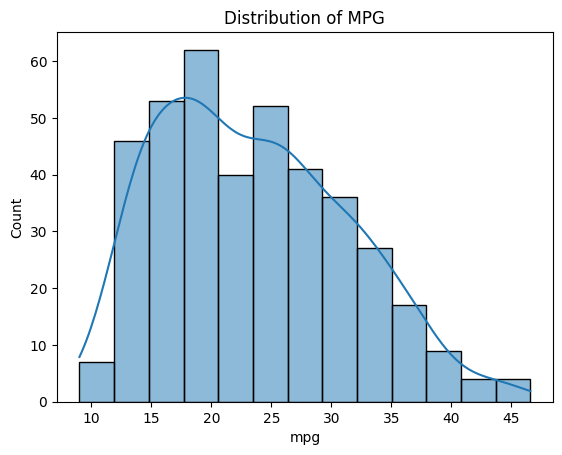

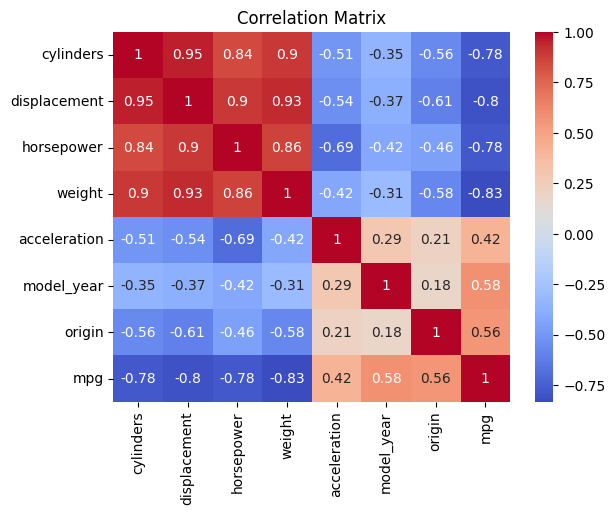

car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = repo.data.original
df.head()
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

print(df.isnull().sum())
df = df.dropna()

target_column = 'mpg'
feature_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

X = df[feature_columns]
y = df[target_column]

if "origin" in X.columns:
    x = pd.get_dummies(X, columns=["origin"]) #referred to professor's code


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


### Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from pandas import Series

model = LinearRegression()

model.fit(x_train, y_train)

print("coefficients:", model.coef_)
print("Y intercept:", model.intercept_)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

coefs = Series(model.coef_, index=x_scaled_df.columns)

coefs_sorted = coefs.sort_values(ascending=False)

print(coefs_sorted)

#Higher values indicate a stronger impact on the target variable
#Positive coefficients mean an increase in the feature value contributes to an increase in the target variable
#Negative coefficients mean an increase in the feature value contributes to a decrease in the target variable
#In this case, an increase in weight decreased our target variable the most i.e mpg decreases drastically with an increase in weight

coefficients: [-0.58280588  2.00722317 -0.83113214 -5.44847281  0.11627027  2.93278483
 -0.83418709  0.436363    0.59484744]
Y intercept: 23.515987619103
model_year      2.932785
displacement    2.007223
origin_3        0.594847
origin_2        0.436363
acceleration    0.116270
cylinders      -0.582806
horsepower     -0.831132
origin_1       -0.834187
weight         -5.448473
dtype: float64


### Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

#Higher r squared value indicates a good fit, 0.79 is a good score
#Lower mean squared error indicates that the predictions are close to the actual values, which is good
#RMSE indicates that on average predicted values are 3.25 units away from actual values

R-squared: 0.792277471402258
Mean Squared Error (MSE): 10.602279011688372
Root Mean Squared Error (RMSE): 3.256114096847402
